# Property price evolution model for Limerick (Ireland)

## Introduction

House pricing has raised in the recent years in Ireland. Buying a house is one of the main lifelong investments families will face off. There are several Real Estate blogs that are giving their forecast opinion through blogs.

This model aims to give answers to this question by runing a model based in different variables explained below.
The model is fed with data collected from [Central Statistics Office](https://www.cso.ie/en/index.html) and media and is focused on Limerick county.

Since is a requirement to have larger amount of data (at least 100 entires), different numpy.random functions have been implemented to generate larger data over the existing ones. 

## Methodology

In order to define the variables that will define the property price, several datasets have been chosen as suitable
and potentially important when it comes to define property price. Some of the dataset ahd enough information to be used in the model while others needed further work to get enough data assuming by regression prediction (Population growth). The list of datasets are below:

All datasets have associated the following information

In [120]:
#import pandas and read datasets
import pandas as pd
path = (r'EDA57.20201230T121257.csv')
nsf = pd.read_csv (path)
print('Number of schools: ',nsf.keys())

path = (r'IIA01.20201230T121251.csv')
inf = pd.read_csv (path)
print('income information: ',inf.keys())
path = (r'MUM01.20201230T121228.csv')
uf = pd.read_csv (path)
print('Unemployement',uf.keys())

Number of schools:  Index(['Statistic', 'Year', 'County', 'School Programme', 'UNIT', 'VALUE'], dtype='object')
income information:  Index(['Statistic', 'Year', 'Electoral Division', 'UNIT', 'VALUE'], dtype='object')
Unemployement Index(['Statistic', 'Month', 'Age Group', 'Sex', 'UNIT', 'VALUE'], dtype='object')


In order to explore each of those and how it looks the information, it has been broken down each one in order to study their values and its distribution.

#### Dataset 1: Number of Schools

Visualization, clean up and select the values interested for our model is required as first instance beforehand.

In [121]:
import seaborn as sns
from matplotlib import pyplot as plt
# reindex the columns just to avoid spaces in the header names
p = nsf.reindex(columns=['Statistic', 'Year', 'County', 'School Programme', 'UNIT', 'VALUE'])
# dataframe just selecting information wanted to select
df1 = p[['Statistic','Year','County','VALUE']]
df1 = df1.loc[df1['Statistic'].str.startswith('Cla')] # Select just the classes


Select Limerick county and sum the values per year:

In [122]:
import numpy as np
## select just Limerick numbers (Limerick, Limerick city and Limerick county)
select_Limerick = df1.loc[df1['County'].str.startswith('Lim')]
## group by Year and sum value
schools_Limerick=select_Limerick.groupby('Year', as_index=False).agg({"VALUE": "sum"})



Plot the values and the regression line to see the trend of the number of schools in the county:

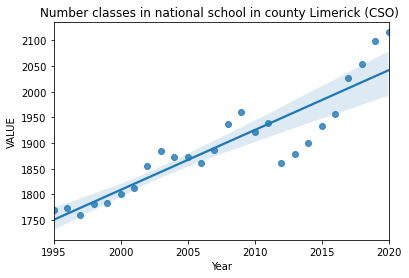

In [123]:
## Plot the distribution and the trend of number of classes in national school in County Limerick
import seaborn as sns
from matplotlib import pyplot as plt
sns.regplot(x="Year", y="VALUE", data=schools_Limerick).set_title('Number classes in national school in county Limerick (CSO) ');


since it has been requested at least 100 entries, it has been chosen numpy.random.randint to create missing data

In [124]:
import numpy as np
new_Years = np.linspace(1900,1994,94,1,dtype=int)
new_Value = np.random.randint(1400, 1750, 94, dtype='l')## set random low, high


In [125]:
row= pd.DataFrame({"Year" : new_Years , "VALUE" : new_Value})

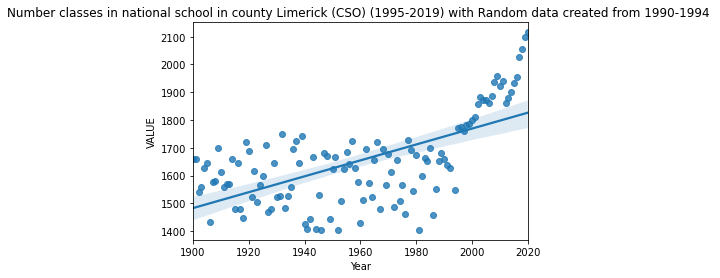

In [126]:
frames = [row,schools_Limerick]
schools_Limerick_concat = pd.concat(frames)
sns.regplot(x="Year", y="VALUE", data=schools_Limerick_concat ).set_title('Number classes in national school in county Limerick (CSO) (1995-2019) with Random data created from 1990-1994 ');

#### Population growth

For Population Growth the data has been obtained from a publication of Limerick.ie (3). Since the data was discontinued, in order to have data for blank years, a linear regression model has been set up to obtain data for the years used to further feed the model (4)

In [127]:
PopGrowth = pd.DataFrame(columns=["year", "Inhabitants"], data=[[1996,165042],[2002,175304],[2006,184055],[2011,191809],[2016,194899]]) ## CSO and 
print(PopGrowth)

   year  Inhabitants
0  1996       165042
1  2002       175304
2  2006       184055
3  2011       191809
4  2016       194899


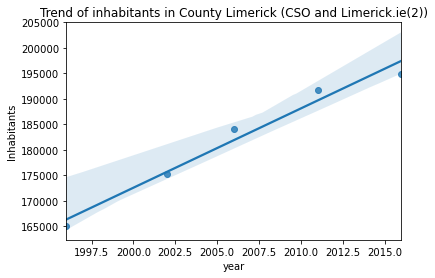

In [128]:
sns.regplot(x="year", y="Inhabitants", data=PopGrowth).set_title('Trend of inhabitants in County Limerick (CSO and Limerick.ie(2))');

since it has been requested at least 100 entries, it has been chosen numpy.random.randint to create missing data

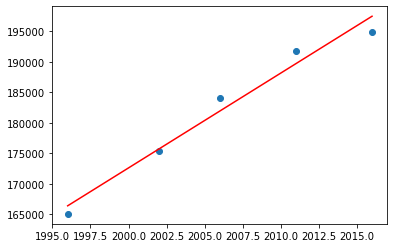

In [129]:
## calculate the regression line
from sklearn.linear_model import LinearRegression

X = pd.DataFrame(PopGrowth['year'].values.reshape(-1, 1)) # values converts it into a numpy array
y = pd.DataFrame(PopGrowth['Inhabitants'].values.reshape(-1, 1)) # -1 means that calculate the dimension of rows, but have 1 column
reg = LinearRegression().fit(X, y)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, y)
plt.plot(X, Y_pred, color='red')
plt.show()

Calculate the values between 2013-2018 (This is the iterval I will use to fit the further model)

In [130]:
X_new = np.array([2013, 2014, 2015, 2016, 2017, 2018]).reshape(-1, 1)
print(linear_regressor.predict(X_new))


[[192788.26578073]
 [194342.15780731]
 [195896.04983389]
 [197449.94186046]
 [199003.83388704]
 [200557.72591362]]


In [131]:
## Create a new population growth dataset with new data obtained from regression model
new_pop_growth = pd.DataFrame(columns=["year", "Inhabitants"], data=[[2013,192788],[2014,194342],[2015,195896],[2016,197450],[2017,199004],[2018,200558]])
print(new_pop_growth)

   year  Inhabitants
0  2013       192788
1  2014       194342
2  2015       195896
3  2016       197450
4  2017       199004
5  2018       200558


Add entries


In [132]:
### Add entries using random.numpy.triangular function
import numpy as np
new_Years_pop = np.linspace(1900,2012,112,1,dtype=int)
new_Value_pop = np.random.triangular(150000, 192788, 192788, 112)## set random low, high


Concatenate dataframe

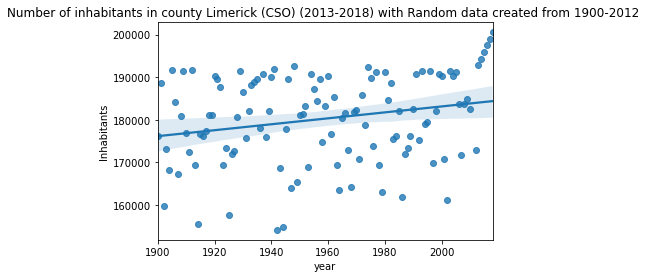

In [133]:
row_Pop_growth= pd.DataFrame({"year" : new_Years_pop , "Inhabitants" : new_Value_pop})
frames = [row_Pop_growth,new_pop_growth]
new_pop_growth = pd.concat(frames)
sns.regplot(x="year", y="Inhabitants", data=new_pop_growth).set_title('Number of inhabitants in county Limerick (CSO) (2013-2018) with Random data created from 1900-2012 ');
##print(new_pop_growth)

#### Unemployement

The unemployement rate has been obtained from Limerick.ie (5)

In [134]:

unempl = pd.DataFrame(columns=["year", "Unemployement rate"], data=[[2012,15.8],[2013,14.4],[2014,12.7],[2015,10.5],[2016,8.8],[2017,7.1],[2018,5.2]])


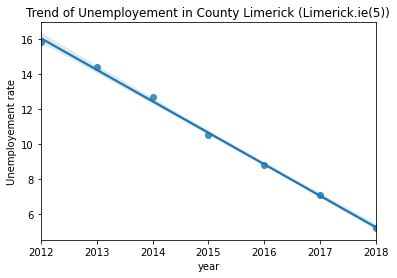

In [135]:
sns.regplot(x="year", y="Unemployement rate", data=unempl).set_title('Trend of Unemployement in County Limerick (Limerick.ie(5))');

Add entries with random function

In [136]:
### Add entries using random.numpy.triangular function
import numpy as np

new_Years_unempl = np.linspace(1900,2011,111,1,dtype=int)

new_Value_unempl = np.random.uniform(10,30, size=(111))

Concatenate data

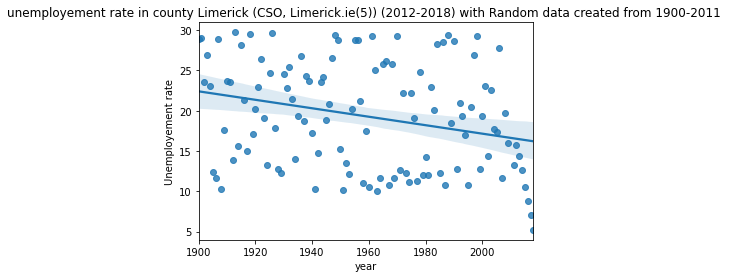

In [137]:
row_unempl= pd.DataFrame({"year" : new_Years_unempl , "Unemployement rate" : new_Value_unempl})
frames = [unempl,row_unempl]
new_unempl = pd.concat(frames)
sns.regplot(x="year", y="Unemployement rate", data=new_unempl).set_title('unemployement rate in county Limerick (CSO, Limerick.ie(5)) (2012-2018) with Random data created from 1900-2011 ');
##print(new_pop_growth)

#### Investment per year

In [138]:
## Investment per year https://www.limerick.ie/business/growing-limerick/facts-and-figures/limericks-recent-economic-growth#:~:text=The%20CSO's%20Labour%20Force%20Survey,of%205.7%25%20in%20Q1%20
invest = pd.DataFrame(columns=["year", "Investment"], data=[[2013,596.0],[2014,80],[2015,569.6],[2016,84.5],[2017,353.7],[2018,346.6]])

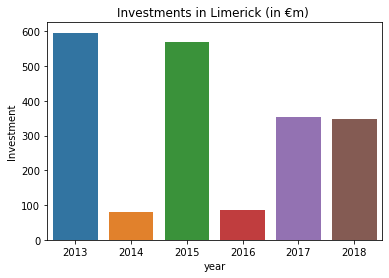

In [139]:
sns.barplot(x="year", y="Investment", data=invest).set_title('Investments in Limerick (in €m) ');

Add entires with random function

In [140]:
### Add entries using random.numpy.triangular function
import numpy as np

new_Years_inv = np.linspace(1900,2012,112,1,dtype=int)

new_Value_inv = np.random.uniform(40,200, size=(112))


concatenate data

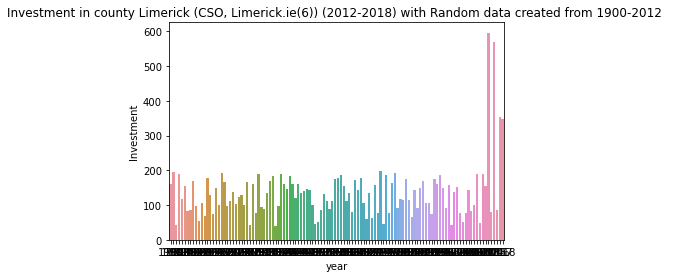

In [141]:
row_inv= pd.DataFrame({"year" : new_Years_inv , "Investment" : new_Value_inv})
frames = [invest,row_inv]
new_inv = pd.concat(frames)
sns.barplot(x="year", y="Investment", data=new_inv).set_title('Investment in county Limerick (CSO, Limerick.ie(6)) (2012-2018) with Random data created from 1900-2012 ');

#### New jobs

In [142]:
njobs = pd.DataFrame(columns=["year", "New Jobs"], data=[[2013,2614],[2014,1300],[2015,3523],[2016,1957],[2017,3326],[2018,1651]])

   year  New Jobs
0  2013      2614
1  2014      1300
2  2015      3523
3  2016      1957
4  2017      3326
5  2018      1651


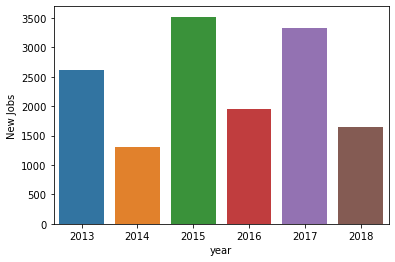

In [143]:
print(njobs)

sns.barplot(x="year", y="New Jobs", data=njobs)

Add entries

In [144]:
### Add entries using random.numpy.uniform function
import numpy as np

new_Years_njobs = np.linspace(1900,2012,112,1,dtype=int)

new_Value_njobs = np.random.randint(500,2000, size=(112))


Concatenate

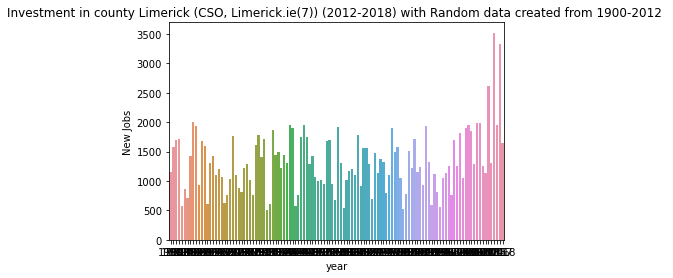

In [145]:
row_njobs= pd.DataFrame({"year" : new_Years_njobs , "New Jobs" : new_Value_njobs})
frames = [njobs,row_njobs]
new_njobs = pd.concat(frames)
sns.barplot(x="year", y="New Jobs", data=new_njobs).set_title('Investment in county Limerick (CSO, Limerick.ie(7)) (2012-2018) with Random data created from 1900-2012 ');

#### Housing Price 

In [146]:
path = (r'HPA02.20210101T190157.csv') ## Source CSO
hp = pd.read_csv (path)
print('housing price',hp.keys())

housing price Index(['Statistic', 'Year', 'County', 'Dwelling Status', 'Stamp Duty Event',
       'Type of Buyer', 'Type of Sale', 'UNIT', 'VALUE'],
      dtype='object')


Select the prices registered for County Limerick

In [147]:
## select just Limerick numbers (Limerick, Limerick city and Limerick county)
select_Limerick = hp.loc[hp['County'].str.startswith('Lim')]
## group by Year and sum value
house_Limerick=select_Limerick.groupby('Year', as_index=False).agg({"VALUE": "mean"})
print(house_Limerick) # I have used the mean, probably a deeper understanding of the databse should be carried out, but It wasn't so clear how to clean up possible outliers

   Year         VALUE
0  2010  69878.280374
1  2011  54093.519302
2  2012  50380.690278
3  2013  48068.300935
4  2014  40076.655841
5  2015  45928.559579
6  2016  51480.507639
7  2017  62999.727103
8  2018  71376.795093
9  2019  83149.634651


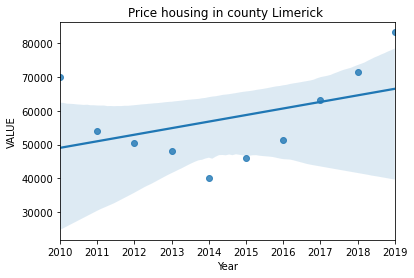

In [148]:
sns.regplot(x="Year", y="VALUE", data=house_Limerick).set_title('Price housing in county Limerick ');

Add entries

In [149]:
### Add entries using random.numpy.uniform function
import numpy as np

new_Years_housing = np.linspace(1900,2009,109,1,dtype=int)

new_Value_housing = np.random.randint(20000,60000, size=(109))

Concatenate values

In [150]:
row_housing= pd.DataFrame({"Year" : new_Years_housing , "VALUE" : new_Value_housing})

frames = [house_Limerick,row_housing]
new_housing = pd.concat(frames)

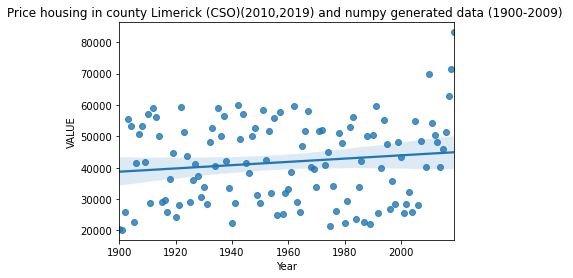

In [151]:
sns.regplot(x="Year", y="VALUE", data=new_housing).set_title('Price housing in county Limerick (CSO)(2010,2019) and numpy generated data (1900-2009) ');

#### Create a unique dataframe merging the information from the ones created above

In [152]:
new = [new_housing["Year"], new_housing["VALUE"]]
headers = ["year", "Property price"]

In [153]:
df4 = pd.concat(new, axis=1, keys=headers)
print(df4)

     year  Property price
0    2010    69878.280374
1    2011    54093.519302
2    2012    50380.690278
3    2013    48068.300935
4    2014    40076.655841
..    ...             ...
104  2004    26023.000000
105  2005    55014.000000
106  2006    28084.000000
107  2007    48460.000000
108  2009    40364.000000

[119 rows x 2 columns]


In [154]:
new_new=pd.merge(df4, new_njobs, on='year')
merge_invest= pd.merge(new_new,new_inv, on='year')
merge_unempl = pd.merge(merge_invest,new_unempl, on='year')
schools = schools_Limerick_concat.rename(columns={'Year': 'year', 'VALUE': 'New Schools'})
merge_schools= pd.merge(merge_unempl, schools, on='year')
merge_Pop_growth= pd.merge(merge_schools, new_pop_growth, on='year')


## Result Dataset

In [156]:
# In case I did a mistake, remove duplicate rows
merge_Pop_growth_=merge_Pop_growth.drop_duplicates()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(merge_Pop_growth)

     year  Property price  New Jobs  Investment  Unemployement rate  \
0    2012    50380.690278      1143  155.046560           15.800000   
1    2013    48068.300935      2614  596.000000           14.400000   
2    2014    40076.655841      1300   80.000000           12.700000   
3    2015    45928.559579      3523  569.600000           10.500000   
4    2016    51480.507639      1957   84.500000            8.800000   
5    2017    62999.727103      3326  353.700000            7.100000   
6    2018    71376.795093      1651  346.600000            5.200000   
7    1900    20452.000000      1161  160.889558           28.939931   
8    1901    20184.000000      1581  195.332354           29.071483   
9    1902    26022.000000      1693   41.238644           23.622404   
10   1903    55467.000000      1719  189.299519           26.927364   
11   1904    53419.000000       578  117.132190           23.100694   
12   1905    22858.000000       870  156.122105           12.450121   
13   1

## Prediction

The kind of predition we are facing is a regression problem since the aim is to predict a continuous-valued attribute associated with an object, in this case to obtain property price for the next years in Limerick.

In [157]:
inputs= merge_Pop_growth[['year','New Jobs','Investment','Unemployement rate','New Schools','Inhabitants']]
outputs = merge_Pop_growth[['Property price']]

In [158]:
## https://datatofish.com/multiple-linear-regression-python/
from sklearn import linear_model
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(inputs, outputs)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)



Intercept: 
 [86310.7047518]
Coefficients: 
 [[-2.69126708e+01  6.73940345e-01  2.38275998e+01 -1.62195578e+02
   1.28495341e+01 -8.07233411e-02]]


First let's try to test the model with an existing values to see if it's performing good. Expecting some value somehow close enough to the value entered by hand

In [162]:
# prediction with sklearn
year = 2016
new_jobs = 1957
new_investment = 84.5
New_Unemployment_Rate = 8.8
New_Schools = 1956.0
New_inhabitants = 197450
print ('Predicted Stock Index Price: \n', regr.predict([[year ,new_jobs, new_investment, New_Unemployment_Rate, New_Schools, New_inhabitants]]))



Predicted Stock Index Price: 
 [[43154.63778387]]


As we can see the result is not too far from 2016 data entered

Now introduce yourself the desired values you want to try:

In [163]:
year = int(input("Year :"))
new_jobs = int(input("New Jobs : "))
new_investment = float(input("Investment in €m : "))
New_Unemployment_Rate = float(input("Unemployment rate : "))
New_Schools = int(input("New classes :"))
New_inhabitants = int(input("New inhabitants :"))
print ('Predicted Stock Index Price: \n', regr.predict([[year ,new_jobs, new_investment, New_Unemployment_Rate, New_Schools, New_inhabitants]]))

Year :2030
New Jobs : 500
Investment in €m : 400
Unemployment rate : 2.0
New classes :2000
New inhabitants :230000
Predicted Stock Index Price: 
 [[48354.30172887]]


## References

(1) Central Statistics Office : (https://www.cso.ie/en/index.html)

(2) Limerick.ie : https://www.limerick.ie/sites/default/files/media/documents/2018-07/Economic%20Profiling%20Report%20for%20Limerick%20City%20and%20County.pdf


(3) Limerick.ie (Population Growth) : https://www.limerick.ie/business/growing-limerick/facts-and-figures/limericks-recent-economic-growth

(4) Towards data Science : (Linear regression) https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d

(5) Limerick.ie (Unemployement rate) https://www.limerick.ie/business/growing-limerick/facts-and-figures/limericks-recent-economic-growth#:~:text=The%20CSO's%20Labour%20Force%20Survey,of%205.7%25%20in%20Q1%202018.

(6) Limerick.ie (investment): https://www.limerick.ie/business/growing-limerick/facts-and-figures/limericks-recent-economic-growth#:~:text=The%20CSO's%20Labour%20Force%20Survey,of%205.7%25%20in%20Q1%20